In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import requests # For API requests
import json # For API requests
import time # To delay API & web scrapping pulls to avoid crashes
from bs4 import BeautifulSoup # For web scrapping
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
import os
import itertools
from datetime import datetime, timedelta
import datetime

os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.style.use('seaborn')
pd.options.display.max_rows = 1000
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [38]:
!pip install scikit-surprise  #installed required package for Recommendation System

# Import Cleaned Yelp Data

In [105]:
dfb = pd.read_csv('yelp_business_edits.csv', index_col = 0)
dfb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Temporary Closed Until,Virtual Services Offered
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,Active Life,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FALSE,0
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,Health & Medical,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FALSE,0
2,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,Home Services,0,0,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FALSE,0
3,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,Home Services,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,FALSE,0
4,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,Automotive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FALSE,0


In [106]:
dfb.categories.value_counts()

Restaurants                     26500
Shopping                        15706
Health & Medical                11544
Beauty & Spas                   11429
Food                            11281
Home Services                    8171
Automotive                       7278
Local Services                   5828
Active Life                      4696
Nightlife                        4615
Event Planning & Services        3013
Arts & Entertainment             2203
Real Estate                      2008
Professional Services            1403
Hotels & Travel                  1351
Education                         791
Pets                              644
Financial Services                466
Local Flavor                      365
Public Services & Government      342
Religious Organizations            83
Mass Media                         31
Name: categories, dtype: int64

# Data Cleaning

### Yelp Business Data

In [107]:
dfb = dfb[dfb['categories']=='Restaurants']
dfb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Temporary Closed Until,Virtual Services Offered
26,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
30,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,Restaurants,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,FALSE,0
31,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,Restaurants,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
32,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,33.393199,-111.976270,4.0,9,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
33,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.640391,-112.187028,3.5,12,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0


In [108]:
dfb.shape

(26500, 35)

In [109]:
# Wanted to see the distribution between states. Want to eliminate any states which had less than 1000 businesses in the dataset
dfb.state.value_counts(ascending = False)

AZ    9135
NV    6229
OH    3439
NC    3344
PA    2513
WI    1146
IL     438
SC     256
Name: state, dtype: int64

In [110]:
dfb = dfb[(dfb['state']=='AZ') | (dfb['state']=='NV') | (dfb['state']=='OH') | (dfb['state']=='NC') | (dfb['state']=='PA') | (dfb['state']=='WI')]
dfb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Temporary Closed Until,Virtual Services Offered
26,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
30,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,Restaurants,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,FALSE,0
31,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,Restaurants,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
32,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,33.393199,-111.976270,4.0,9,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
33,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.640391,-112.187028,3.5,12,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0


In [111]:
# Next only wanted to account for cities which had at least 100 businesses in the data set
counts = dfb.city.value_counts(ascending = False)
counts[counts>100]

Las Vegas         5478
Phoenix           3222
Charlotte         2157
Pittsburgh        1940
Scottsdale        1171
Cleveland         1107
Mesa               972
Madison            828
Tempe              813
Chandler           722
Henderson          708
Glendale           621
Gilbert            472
Peoria             299
Concord            262
Surprise           192
Gastonia           174
Matthews           165
Avondale           163
Goodyear           162
Akron              149
Mentor             143
Lakewood           135
Huntersville       128
Cuyahoga Falls     118
Strongsville       102
Monroeville        101
Name: city, dtype: int64

In [112]:
# Subsetted a new dataframe with the minimum city parameters
dfb = dfb[dfb['city'].isin(counts[counts>100].index)]
dfb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Temporary Closed Until,Virtual Services Offered
26,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
30,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,Restaurants,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,FALSE,0
31,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,Restaurants,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
32,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,33.393199,-111.976270,4.0,9,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
33,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.640391,-112.187028,3.5,12,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0


### Yelp User Data

In [3]:
dfu = pd.read_csv('yelp_users.csv', index_col = 0)
dfu.head()

/Users/Dan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Dan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.84,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.44,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.08,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.37,8,9,2,1,1,22,28,31,31,19,31


### Yelp Reviews Data

In [5]:
dfr = pd.read_csv('yelp_reviews.csv', index_col = 0)
dfr.head()

/Users/Dan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [114]:
dfr.shape

(8021124, 9)

In [115]:
# include only reviews that were in the restauants list of businesses
df = dfr[dfr['business_id'].isin(list(dfb.business_id.values))]
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57
5,L2O_INwlrRuoX05KSjc4eg,5vD2kmE25YBrbayKhykNxQ,nlxHRv1zXGT0c0K51q3jDg,5.0,2.0,0.0,0.0,This is definitely my favorite fast food sub s...,2013-05-07 07:25:25
6,ZayJ1zWyWgY9S_TRLT_y9Q,aq_ZxGHiri48TUXJlpRkCQ,Pthe4qk5xh4n-ef-9bvMSg,5.0,1.0,0.0,0.0,"Really good place with simple decor, amazing f...",2015-11-05 23:11:05


In [116]:
len(df.business_id.unique())

22504

In [117]:
# drop not needed columns
df.drop(columns=['review_id','useful','funny','cool','text','date'], inplace = True)

/Users/Dan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [118]:
df.head()

,user_id,business_id,stars
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0
5,5vD2kmE25YBrbayKhykNxQ,nlxHRv1zXGT0c0K51q3jDg,5.0
6,aq_ZxGHiri48TUXJlpRkCQ,Pthe4qk5xh4n-ef-9bvMSg,5.0


In [119]:
# Next only wanted to account for cities which had at least 100 businesses in the data set
user_counts = df.user_id.value_counts(ascending = False)
user_counts[user_counts>=5]

bLbSNkLggFnqwNNzzq-Ijw    1213
ELcQDlf69kb-ihJfxZyL0A    1089
DK57YibC5ShBmqQl97CKog     814
U4INQZOPSUaj8hMjLlZ3KA     800
d_TBs6J3twMy9GChqUEXkg     772
                          ... 
OK6QFxNMQmulkwUpoRKRJQ       5
-G21auYBjfhY3-xqfcaffg       5
Qa5rYIjnwVw2KM954gHFFg       5
bHtXt8AkP3w-cANI1tz8Pw       5
k3sSW7ICfwJn9CNAET6jfg       5
Name: user_id, Length: 113903, dtype: int64

In [120]:
df = df[df['user_id'].isin(user_counts[user_counts>=5].index)]
df.reset_index(drop=True)
# This will be the dataset used for modeling
df.head()

,user_id,business_id,stars
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0
5,5vD2kmE25YBrbayKhykNxQ,nlxHRv1zXGT0c0K51q3jDg,5.0
6,aq_ZxGHiri48TUXJlpRkCQ,Pthe4qk5xh4n-ef-9bvMSg,5.0


In [121]:
df.stars.value_counts()

5.0    570975
4.0    426764
3.0    220398
2.0    136022
1.0    135803
Name: stars, dtype: int64

# EDA

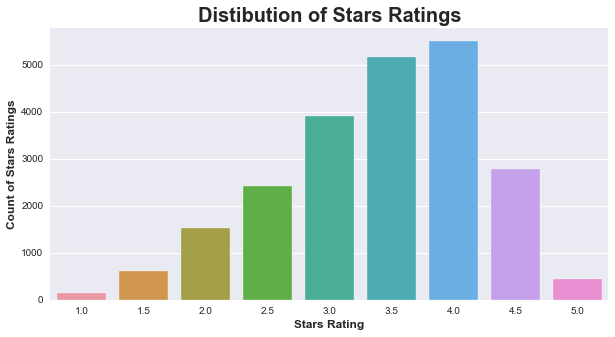

In [155]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(dfb['stars'])
plt.title('Distibution of Stars Ratings', fontsize = 20,fontweight='bold')
plt.ylabel('Count of Stars Ratings', fontsize = 12,fontweight='bold')
plt.xlabel('Stars Rating', fontsize = 12,fontweight='bold');
# plt.savefig('Count_of_Ratings_edited.png')

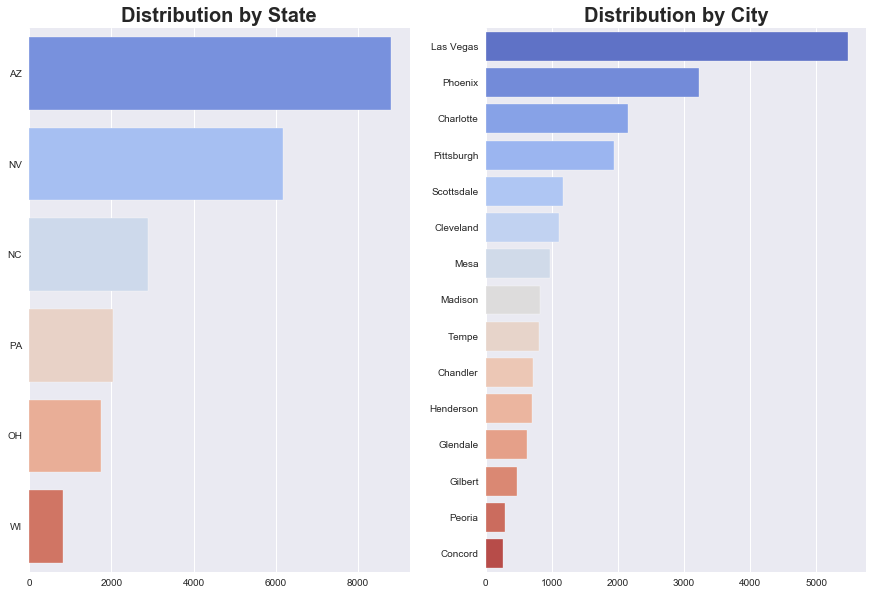

In [159]:
f,ax = plt.subplots(1,2, figsize=(15,10))
ax1,ax2, = ax.flatten()
state1 = dfb['state'].value_counts()

sns.barplot(state1, state1.index, palette = 'coolwarm', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Distribution by State',fontweight='bold', fontsize=(20))

city1 = dfb['city'].value_counts()[:15]

sns.barplot(city1, city1.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Distribution by City',fontweight='bold', fontsize=(20));
# plt.savefig('Distibution_by_State_City_edited.png')

In [113]:
dfb.shape

(22504, 35)

# Modeling

In [78]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [79]:
reader = Reader(rating_scale=(1, 5))  #set scale for ratings from 0-5
data = Dataset.load_from_df(df, reader)  #converts into object that Suprise can use

In [80]:
dataset = data.build_full_trainset()  #building a training dataset from here
print('Number of users: ', dataset.n_users, '\n')  #wanted to output number of users and items
print('Number of items: ', dataset.n_items)

Number of users:  113903 

Number of items:  22356


In [104]:
from surprise import SVD
from surprise import NMF
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import CoClustering
from surprise.model_selection import cross_validate
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), NormalPredictor(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_mae')    

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_mae,fit_time,test_time
Algorithm,,,
SVD,0.923808,86.759242,11.323068
BaselineOnly,0.928412,6.011262,7.955164
CoClustering,0.932897,66.345533,6.963847
NMF,0.989975,139.236519,11.924564
NormalPredictor,1.336245,3.238446,10.481637


### Baseline Grid Search

In [84]:
bsl_options = {'reg_i': [10,15],
         'reg_u': [15,20],
         "n_epochs": [10,15]}
param_grid = {'bsl_options':bsl_options}
g_s_bso = GridSearchCV(BaselineOnly, param_grid, n_jobs = -1, cv = 3, joblib_verbose = 10)
g_s_bso.fit(data)
print(g_s_bso.best_score)
print(g_s_bso.best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.6min
/Users/Dan/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed: 12.5min remaining:  2.5min


{'rmse': 1.160179405575476, 'mae': 0.928517010478289}
{'rmse': {'bsl_options': {'reg_i': 10, 'reg_u': 15, 'n_epochs': 10}}, 'mae': {'bsl_options': {'reg_i': 10, 'reg_u': 15, 'n_epochs': 15}}}


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 14.9min finished


### SVD Grid Search

In [97]:
params = {'n_factors': [100, 150],
         'reg_all': [0.05, 0.1],
         "n_epochs": [20, 30]}
g_s_svd = GridSearchCV(SVD, param_grid = params, n_jobs = -1, cv = 3, joblib_verbose = 10)
g_s_svd.fit(data)

print(g_s_svd.best_score)
print(g_s_svd.best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  8.0min
/Users/Dan/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed: 26.1min remaining:  5.2min


{'rmse': 1.1522195629381289, 'mae': 0.9140564249608584}
{'rmse': {'n_factors': 100, 'reg_all': 0.1, 'n_epochs': 30}, 'mae': {'n_factors': 100, 'reg_all': 0.1, 'n_epochs': 30}}


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 31.3min finished


# Building Recommendation System

In [98]:
svd = SVD(n_factors=100, reg_all=0.1, n_epochs=30, verbose = True)  #wanted to test prediction on single user
svd.fit(dataset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29


In [101]:
svd.predict(2, 4)

Prediction(uid=2, iid=4, r_ui=None, est=3.779272223049984, details={'was_impossible': False})

In [160]:
import csv  #imported to have CSV file in a folder 
df.to_csv('model_data.csv')

## Collaborative Filtering

In [122]:
df_rec = dfb[dfb['business_id'].isin(list(df.business_id.values))].reset_index(drop=True)
df_rec.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Temporary Closed Until,Virtual Services Offered
0,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
1,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,Restaurants,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,FALSE,0
2,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,Restaurants,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
3,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,33.393199,-111.976270,4.0,9,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
4,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.640391,-112.187028,3.5,12,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0


In [123]:
df_rec.drop(columns=['latitude','longitude','stars','ByAppointmentOnly','AcceptsInsurance',
                    'Call To Action enabled','Request a Quote Enabled','Temporary Closed Until',
                    'Virtual Services Offered'], inplace = True)

In [124]:
df_rec.head()

,business_id,name,address,city,state,postal_code,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled
0,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,15,0,Restaurants,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,23,1,Restaurants,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,10,0,Restaurants,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,9,0,Restaurants,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,12,0,Restaurants,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [162]:
import csv  #imported to have CSV file in a folder 
df_rec.to_csv('model1_data.csv')

In [137]:
def recommendations_basic(user_id, model, num, state): # input user_id, model type, # of recommendations, choose state
    business_rating = []
    for business_id in df['business_id'].unique(): # make predictions for the user
        business_rating.append((business_id,model.predict(user_id,business_id)[3])) # add predicitions for all businesses
    business_preds = pd.DataFrame(business_rating) # change the data into a data frame
    business_preds.columns = ['business_id','stars'] # rename columns
    business_preds = business_preds.sort_values(by='stars',ascending=False) # sort predictions by highest rated
    business_rec = business_preds.merge(df_rec, on = 'business_id', how ='inner') # merged data frames in order to reccommend movie titles 
    business_rec = business_rec.drop_duplicates(subset='business_id',keep='first')
    state_rec = business_rec[business_rec['state'] == state]
    return state_rec[0:num]

In [139]:
recommendations_basic('V34qejxNsCbcgD8C0HVk-Q', svd, 5, 'PA')

,business_id,stars,name,address,city,state,postal_code,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled
27,6RbCJLiwNYwS6ab9vzD_zg,4.646417,Pitaland,620 Brookline Blvd,Pittsburgh,PA,15226,113,1,Restaurants,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,1
38,L0DJ7-GUDMLIlIR-7vykvQ,4.628590,Merante's Gifts,4723 Liberty Ave,Pittsburgh,PA,15224,17,1,Restaurants,0,0,1,2,0,0,1,1,0,0,1,0,0,0,0,1,0
40,TcCWYYL6FxBTT6KrxabwRg,4.625338,Edgar's Best Tacos,108 S 19th St,Pittsburgh,PA,15222,79,1,Restaurants,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0
44,3D6Uck9QSdxZKFstf5DGlg,4.616950,Blue Sparrow Food Truck,3800 Butler St,Pittsburgh,PA,15201,42,1,Restaurants,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
45,2d9yZ11uVa83OEQWxe4vlQ,4.614930,Conicella Pizza,422 Greenfield Ave,Pittsburgh,PA,15207,41,0,Restaurants,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## Content Filtering

In [143]:
df_con = dfb[dfb['business_id'].isin(list(df.business_id.values))].reset_index(drop=True)
df_con.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled,Call To Action enabled,Request a Quote Enabled,Temporary Closed Until,Virtual Services Offered
0,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
1,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,Restaurants,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,FALSE,0
2,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,Restaurants,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
3,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,33.393199,-111.976270,4.0,9,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0
4,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.640391,-112.187028,3.5,12,0,Restaurants,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,FALSE,0


In [144]:
df_con.drop(columns=['latitude','longitude','ByAppointmentOnly','AcceptsInsurance',
                    'Call To Action enabled','Request a Quote Enabled','Temporary Closed Until',
                    'Virtual Services Offered'], inplace = True)

In [145]:
df_con.head()

,business_id,name,address,city,state,postal_code,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled
0,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,2.5,15,0,Restaurants,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,4.5,23,1,Restaurants,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,3.0,10,0,Restaurants,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,4.0,9,0,Restaurants,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,3.5,12,0,Restaurants,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [151]:
def recommendations_cont(num, state, city, price, choice, rcount): # input # of recommendations, choose state, City, Price Pt
    state_rec = df_con[df_con['state'] == state]
    city_rec = state_rec[state_rec['city'] == city]
    price_rec = city_rec[city_rec['RestaurantsPriceRange2'] == price]
    choice_rec = price_rec[price_rec['delivery or takeout'] == choice]
    review_rec = choice_rec[choice_rec['review_count'] >= rcount]
    return review_rec.sort_values(by='stars',ascending = False)[0:num]

In [152]:
recommendations_cont(5, 'AZ', 'Phoenix', 2, 1, 50)

,business_id,name,address,city,state,postal_code,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,GoodForKids,BusinessParking,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,OutdoorSeating,Caters,WheelchairAccessible,BYOB,HappyHour,DriveThru,delivery or takeout,Grubhub enabled
3671,WZVnmFXoE42coc4FmcbEDQ,My Gal Sal Bakery & Cafe,15820 N 35th Ave,Phoenix,AZ,85053,5.0,100,1,Restaurants,0,0,1,2,0,1,0,0,0,1,1,1,0,0,0,1,1
15086,Xg5qEQiB-7L6kGJ5F4K3bQ,Little Miss BBQ,4301 E University Dr,Phoenix,AZ,85034,5.0,2329,1,Restaurants,0,0,1,2,0,0,0,1,0,1,0,1,0,0,0,1,0
7450,5pEQwYimyfp5wpeudYNahw,El Charro Hipster Bar and Cafe,"1325 Grand Ave, Ste 4",Phoenix,AZ,85007,5.0,122,1,Restaurants,0,0,1,2,1,1,1,1,1,1,1,1,0,1,0,1,1
19676,O4kYogia0fbF85pCX10XiA,Koi Poke - Arcadia,"4280 E Indian School, Ste 108",Phoenix,AZ,85018,5.0,144,1,Restaurants,0,0,1,2,1,1,0,1,1,1,1,1,0,0,0,1,1
21396,U5Ow3ffmrG4MmTZLK6jd-g,Soup & Sausage Bistro,13240 N 7th St,Phoenix,AZ,85022,5.0,172,1,Restaurants,0,0,1,2,0,1,1,1,1,0,1,1,0,1,0,1,1


In [163]:
import csv  #imported to have CSV file in a folder 
df_con.to_csv('model2_data.csv')